# 曲线拟合

导入基础包：

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 多项式拟合

导入线多项式拟合工具：

In [2]:
from numpy import polyfit, poly1d

产生数据：

In [3]:
x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5

画出数据：

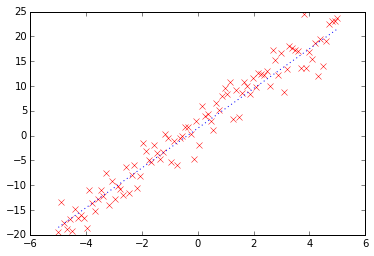

In [4]:
%matplotlib inline

p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

进行线性拟合，`polyfit` 是多项式拟合函数，线性拟合即一阶多项式：

In [5]:
coeff = polyfit(x, noise_y, 1)
print coeff

[ 4.08201064  1.84432514]


一阶多项式 $y = a_1 x + a_0$ 拟合，返回两个系数 $[a_1, a_0]$。

画出拟合曲线：

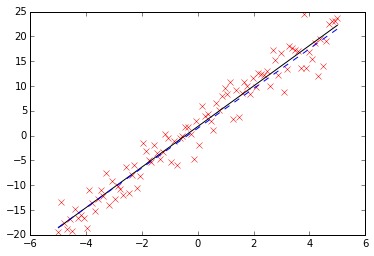

In [6]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')
p = plt.plot(x, y, 'b--')

还可以用 `poly1d` 生成一个以传入的 `coeff` 为参数的多项式函数：

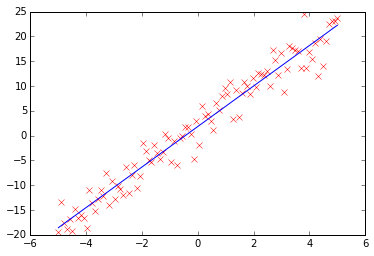

In [7]:
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

In [8]:
f

poly1d([ 4.08201064,  1.84432514])

显示 `f`：

In [9]:
print f

 
4.082 x + 1.844


还可以对它进行数学操作生成新的多项式：

In [10]:
print f + 2 * f ** 2

       2
33.33 x + 34.2 x + 8.647


## 多项式拟合正弦函数

正弦函数：

In [16]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)

用一阶到九阶多项式拟合，类似泰勒展开：

In [17]:
y1 = poly1d(polyfit(x,y,1))
y3 = poly1d(polyfit(x,y,3))
y5 = poly1d(polyfit(x,y,5))
y7 = poly1d(polyfit(x,y,7))
y9 = poly1d(polyfit(x,y,9))

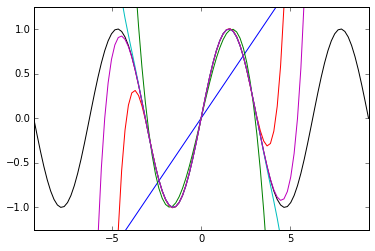

In [18]:
x = np.linspace(-3 * np.pi,3 * np.pi,100)

p = plt.plot(x, np.sin(x), 'k')
p = plt.plot(x, y1(x))
p = plt.plot(x, y3(x))
p = plt.plot(x, y5(x))
p = plt.plot(x, y7(x))
p = plt.plot(x, y9(x))

a = plt.axis([-3 * np.pi, 3 * np.pi, -1.25, 1.25])

黑色为原始的图形，可以看到，随着多项式拟合的阶数的增加，曲线与拟合数据的吻合程度在逐渐增大。

## 最小二乘拟合

导入相关的模块：

In [20]:
from scipy.linalg import lstsq
from scipy.stats import linregress
from scipy.optimize import leastsq

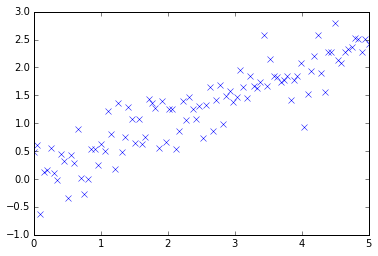

In [21]:
x = np.linspace(0,5,100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35

plt.plot(x,y,'x')